In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


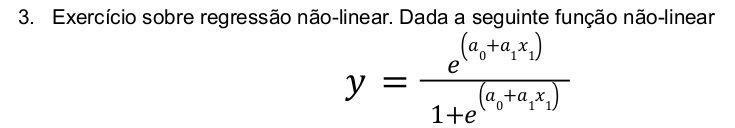

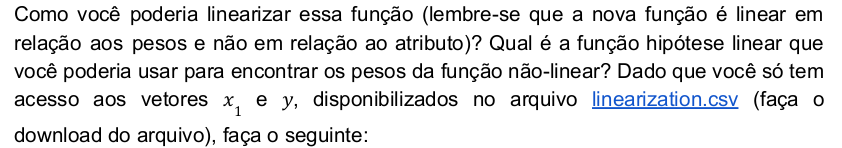

In [3]:
vec = pd.read_csv('linearization.csv')

In [4]:
vec

,x1,y
0,0.010000,0.916575
1,0.010046,0.916595
2,0.010093,0.916615
3,0.010139,0.916636
4,0.010186,0.916656
...,...,...
995,0.981730,0.999632
996,0.986266,0.999641
997,0.990823,0.999650
998,0.995401,0.999659


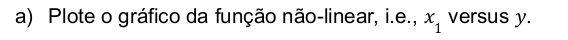

<AxesSubplot:xlabel='x1'>

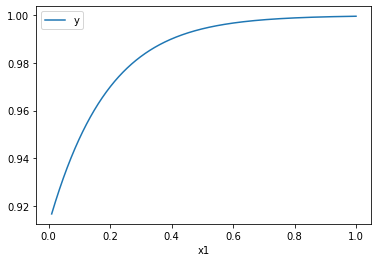

In [5]:
vec.plot(x='x1',y='y',kind='line')

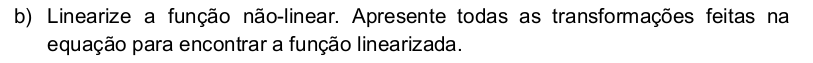

# Linearizando a função não linear.

# $y=\frac{e^{a_0 + a_1x}}{1+e^{a_0 + a_1x}} \Rightarrow $
# $y_1 = \frac{1}{y} \Rightarrow$
# $y_1 = \frac{1+e^{a_0 + a_1x}}{e^{a_0 + a_1x}} = 1 + e^{-a_0 - a_1x} \Rightarrow $
# $y_2 = y_1 - 1 \Rightarrow$
# $y_2 = e^{-a_0 - a_1x} \Rightarrow$
# $y_3 = ln(y_2) \Rightarrow$
# $y_3 = -a_0 -a_1x \Rightarrow$
# $y_4 = -y_3 \Rightarrow$
# $y_4 = a_0 + a_1x $                
## (Função linearizada)


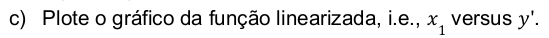

In [6]:
#Obtendo valores de x e y do dataset
vecnp = vec.to_numpy()
x = vecnp[:,0]
y = vecnp[:, 1]

#Fazendo as transformações para y

y_1 = 1/y
y_2 = y_1 - 1
y_3 = np.log(y_2)
y_4 = -1*y_3


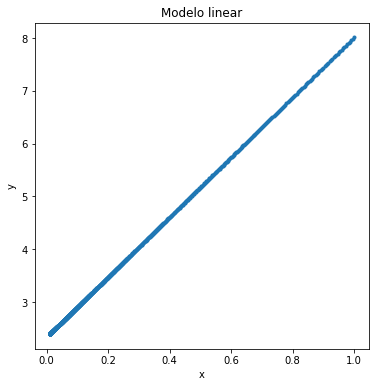

In [7]:
plt.figure(figsize=(6,6))
plt.title('Modelo linear')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y_4,'.')
plt.show()

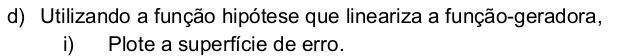

In [8]:
#Gerando função custo
n = 300
a0 = np.linspace(-15,15,n)          #Definindo o "domínino" da função custo, que é do R2 
a1 = np.linspace(-15,15,n)
A0,A1=np.meshgrid(a0,a1)

#Gerando os pontos do eixo z do gráfico da função custo

C = np.zeros((n,n))
for i in range(0,n):
    for j in range(0,n):
        yE = A0[i][j]+A1[i][j]*x
        C[i][j] = (1/1)*np.sum(np.square(yE - y))                 #soma do erro quadrático



/tmp/ipykernel_9228/2904660096.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = figura.gca(projection='3d')


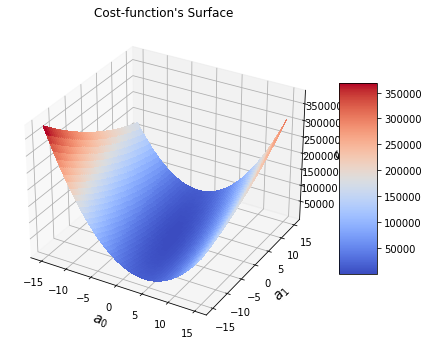

In [9]:
#plotando C(a0,a1)

figura = plt.figure(figsize=(7,7))
ax = figura.gca(projection='3d')
surf = ax.plot_surface(A0, A1, C, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Adicionando cores.
figura.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_0$', fontsize=14)
ax.set_ylabel('$a_1$', fontsize=14)
ax.set_zlabel('$C_e$', fontsize=14);
plt.title('Cost-function\'s Surface')
#plt.savefig("error_surface_linearization.png", dpi=600)
#plotando.
plt.show()


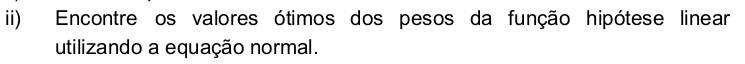

# Equação normal utilizada para encontrar vetor de parâmetros $\vec{\theta}$

# $\vec{\theta} = (XX^T)^{-1}X^T\vec{y}$

# $\vec{\theta} = (a_0,a_1)$

In [125]:
#transformando dados para vetores colina e linha

x_c = x.reshape((1000,1))
y_c = x.reshape((1000,1))

x_l = x.reshape((1,1000))
y_l = x.reshape((1,1000))

#Obtendo matriz de coeficientes (1, xi)
x_m = np.ones((1000,2))
x_m[:,1] = x_l

#obtendo parâmetros a partir da equação normal
theta = np.dot(x_m.T,x_m)
theta = np.linalg.inv(theta)
theta = np.dot(theta,x_m.T)
theta=np.dot(theta,y)
theta


array([0.93152708, 0.10480674])

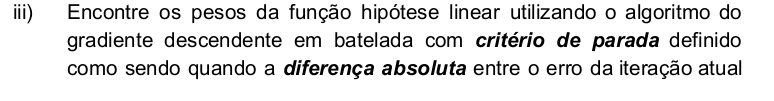

# Seŕa utilizado a variação do custo em relação aos parâmetros $\vec{\theta}$

# $\nabla_{\theta}MSE(\vec{\theta}) = \frac{2}{m}X^T(X \cdot \vec{\theta}-\vec{y} )$

In [128]:
#escrevendo o algoritmo de descida de gradiente como uma função

def DescidaDeGradiente(X, y, alpha, n_iter, precisao):
    
    M = len(y)
    
    # Inicialização dos parâmetros
    a = np.array([-10.0, -10.0]).reshape(2, 1)

    # Criando um vetor histórico para os parâmetros 
    a_hist = np.zeros((2, n_iter+1))
    # Inicializando o vetor histórico
    a_hist[:, 0] = a.reshape(2,)

    # criando vetor histórico erro
    err = np.zeros(n_iter+1)

    err[0] = (1.0/M)*sum(np.power(y - X.dot(a), 2))

    # Iterações
    iter_ = 0
    error = 1
    grad_hist = np.zeros((2, n_iter))
    while iter_ < n_iter and error > precisao:
        gradients = -(2.0/M)*X.T.dot(y - X.dot(a))
        grad_hist[:, iter_] = gradients.reshape(2,)
        a = a - alpha*gradients
        a_hist[:, iter_+1] = a.reshape(2,)
        err[iter_+1] = (1.0/M)*sum(np.power((y - X.dot(a)), 2))
        error = np.abs(err[iter_+1] - err[iter_])
        iter_ = iter_ + 1
    return a, err, a_hist, grad_hist, iter_

In [174]:
# taxa de aprendizagem
alpha = 0.01

# critério de parada - iterações
n_iter = 10000

# critério de parada - precisão
precisao = 1e-9

a,err, a_hist, grad_hist, iter_ = DescidaDeGradiente(x_m, y_c, alpha, n_iter, precisao)

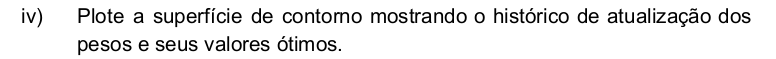

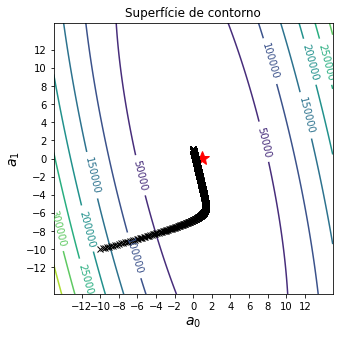

In [175]:
# Plotando   
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A0, A1, C)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_0$', fontsize=14)
plt.ylabel('$a_1$', fontsize=14)
plt.title('Superfície de contorno')
#Mostrando valor dos parametros pela Eq normal(estrela)
plt.plot(theta[0], theta[1], c='r', marker='*', markersize=14) 

plt.plot(a_hist[0, 0:iter_], a_hist[1, 0:iter_], 'kx')
plt.xticks(np.arange(-12, 14, step=2.0))
plt.yticks(np.arange(-12, 14, step=2.0))
#plt.savefig("Superficie de contorno.png", dpi=600)
plt.show()

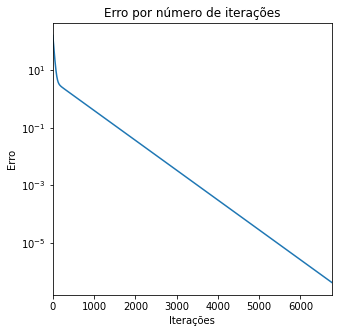

In [176]:
#plotando a curva de erro 
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(0, iter_), err[0:iter_])
plt.xlim((0, iter_))
plt.yscale('log')
plt.xlabel('Iterações')
plt.ylabel('Erro')
plt.title('Erro por número de iterações')
# Save figure
#plt.savefig("error-vs-iteration-number-linearization.png", dpi=600)
plt.show()

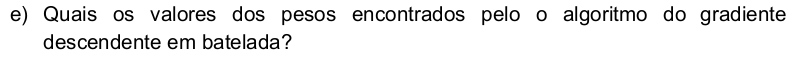

In [177]:
#printando valores dos parametros
print('a0 = ',a[0])
print('a1 = ',a[1])

a0 =  [0.00059028]
a1 =  [0.99742153]


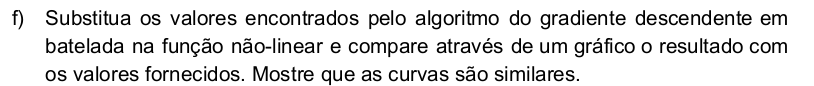

<AxesSubplot:title={'center':'Valores Fornecidos (linearization.csv)'}, xlabel='x1'>

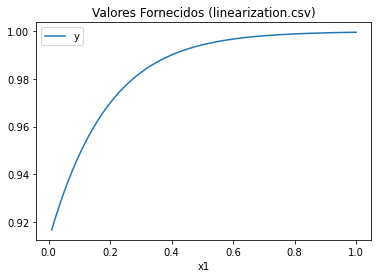

In [179]:
vec.plot(x='x1',y='y',kind='line', title = 'Valores Fornecidos (linearization.csv)')

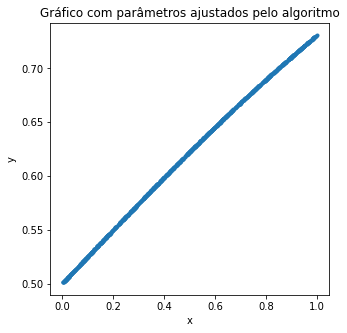

In [222]:
# Resetando gerador de números pseudo-aleatórios
np.random.seed(42)

# Definindo resolução de pontos
M = 1000

# Número de euler
e = 2.71828

u = np.random.rand(M, 1)

# Non-linear model.
v =    e**(a[0] + (a[1]*u)) / (1 + e**(a[0] + a[1]*u)) 



plt.figure(figsize=(5,5))
plt.title('Gráfico com parâmetros ajustados pelo algoritmo')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(u, v, '.')
plt.show()

In [223]:
v

array([[0.59246486],
       [0.72088436],
       [0.67495805],
       [0.64513101],
       [0.53897242],
       [0.53896644],
       [0.51462685],
       [0.70360674],
       [0.64569175],
       [0.6697018 ],
       [0.50528023],
       [0.7247204 ],
       [0.69654222],
       [0.55289675],
       [0.5453615 ],
       [0.5457521 ],
       [0.57543175],
       [0.62808106],
       [0.606213  ],
       [0.57225765],
       [0.64813812],
       [0.53487437],
       [0.57248115],
       [0.59049383],
       [0.61194231],
       [0.68648586],
       [0.54977189],
       [0.62562623],
       [0.64370395],
       [0.51172807],
       [0.64715756],
       [0.54256537],
       [0.51636268],
       [0.72051719],
       [0.72386835],
       [0.69144909],
       [0.57552228],
       [0.52448303],
       [0.664421  ],
       [0.60816552],
       [0.53054037],
       [0.6211636 ],
       [0.50872164],
       [0.71250171],
       [0.56431739],
       [0.65957567],
       [0.57725072],
       [0.626